In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#read in csvs

city_data = pd.read_csv('city_data.csv')
city_data.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride_data = pd.read_csv('ride_data.csv')
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
#merge two tables
merged_df = pd.merge(ride_data, city_data, how = 'inner', on='city')
merged_df.head()


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [5]:
#Average Fare ($) Per City

#group merged_data by city
grouped_df = merged_df.groupby('city')

grouped_df.count().head(10)

,date,fare,ride_id,driver_count,type
city,,,,,
Alvarezhaven,31,31,31,31,31
Alyssaberg,26,26,26,26,26
Anitamouth,9,9,9,9,9
Antoniomouth,22,22,22,22,22
Aprilchester,19,19,19,19,19
Arnoldview,31,31,31,31,31
Campbellport,15,15,15,15,15
Carrollbury,10,10,10,10,10
Carrollfort,29,29,29,29,29


In [6]:
# calculate average ride fare per city

avg_fare_city = round(grouped_df['fare'].mean(),2)

avg_fare_city.head(10)

city
Alvarezhaven    23.93
Alyssaberg      20.61
Anitamouth      37.32
Antoniomouth    23.62
Aprilchester    21.98
Arnoldview      25.11
Campbellport    33.71
Carrollbury     36.61
Carrollfort     25.40
Clarkstad       31.05
Name: fare, dtype: float64

In [9]:
#Total Number of Rides Per City

num_rides_city = grouped_df['ride_id'].count()
num_rides_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [10]:
#set index of city data to city
city_data_new = city_data.set_index('city')
city_data_new.head()

,driver_count,type
city,,
Kelseyland,63,Urban
Nguyenbury,8,Urban
East Douglas,12,Urban
West Dawnfurt,34,Urban
Rodriguezburgh,52,Urban


In [11]:
#Total Number of Drivers Per City
num_drivers = city_data_new['driver_count']
num_drivers.head()

city
Kelseyland        63
Nguyenbury         8
East Douglas      12
West Dawnfurt     34
Rodriguezburgh    52
Name: driver_count, dtype: int64

In [12]:
#City Type (Urban, Suburban, Rural)
city_type = city_data_new['type']
city_type.head()

city
Kelseyland        Urban
Nguyenbury        Urban
East Douglas      Urban
West Dawnfurt     Urban
Rodriguezburgh    Urban
Name: type, dtype: object

In [13]:
# dataframe

pyber_df = pd.DataFrame({
#    "City": city_data_new,
    "Number of Rides": [num_rides_city],
    "Number of Drivers": [num_drivers],
    "Average Fare per City": [avg_fare_city],
    "City Type": grouped_df['type'],
})

pber_df.head()


ValueError: arrays must all be same length

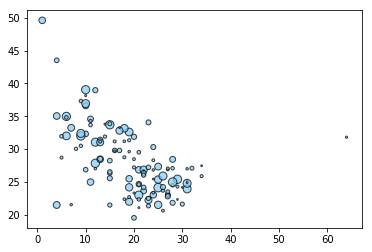

In [18]:
#bubble plot of data
import seaborn as sns
plt.scatter(num_rides_city, avg_fare_city, marker="o", color="lightskyblue", edgecolors="black",
            s=num_drivers, alpha=0.75)

#colors = sns.color_palette()

#sns.lmplot(num_rides_city, avg_fare_city, hue = city_type)